<a href="https://colab.research.google.com/github/sgvaidya/ML_Projects/blob/main/Emojify_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = '/content/drive/MyDrive/dataset/train'
val_dir = '/content/drive/MyDrive/dataset/test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')
validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28729 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

In [ ]:
emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
448/448 [==============================] - 5994s 13s/step - loss: 1.8061 - accuracy: 0.2583 - val_loss: 1.7272 - val_accuracy: 0.3207
Epoch 2/50
448/448 [==============================] - 387s 865ms/step - loss: 1.6443 - accuracy: 0.3579 - val_loss: 1.5653 - val_accuracy: 0.4068
Epoch 3/50
448/448 [==============================] - 386s 862ms/step - loss: 1.5451 - accuracy: 0.4046 - val_loss: 1.4787 - val_accuracy: 0.4368
Epoch 4/50
448/448 [==============================] - 386s 861ms/step - loss: 1.4670 - accuracy: 0.4381 - val_loss: 1.4217 - val_accuracy: 0.4597
Epoch 5/50
448/448 [==============================] - 385s 859ms/step - loss: 1.4001 - accuracy: 0.4662 - val_loss: 1.3384 - val_accuracy: 0.4932
Epoch 6/50
448/448 [==============================] - 385s 858ms/step - loss: 1.3462 - accuracy: 0.4874 - val_loss: 1.3003 - val_accuracy: 0.5056
Epoch 7/50
448/448 [==============================] - 386s 861ms/step - loss: 1.3025 - accuracy: 0.5061 - val_loss: 1.2728 - 

In [ ]:
emotion_model.save_weights('model.h5')

In [ ]:
cv2.ocl.setUseOpenCL(False)

emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    bounding_box = cv2.CascadeClassifier('/home/shivam/.local/lib/python3.6/site-packages/cv2/data/haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2gray_frame)
    num_faces = bounding_box.detectMultiScale(gray_frame,scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    cv2.imshow('Video', cv2.resize(frame,(1200,860),interpolation = cv2.INTER_CUBIC))
    if cv2.waitKey(1) & 0xFF == ord('q'):
      cap.release()
      cv2.destroyAllWindows()
    break

In [ ]:
import tkinter as tk
from tkinter import *
import cv2
from PIL import Image, ImageTk
import os
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))
emotion_model.load_weights('model.h5')

cv2.ocl.setUseOpenCL(False)

emotion_dict = {0: "   Angry   ", 1: "Disgusted", 2: "  Fearful  ", 3: "   Happy   ", 4: "  Neutral  ", 5: "    Sad    ", 6: "Surprised"}


emoji_dist={0:"/content/drive/MyDrive/Emojis/angry.jpg",2:"/content/drive/MyDrive/Emojis/disgusted.png",2:"/content/drive/MyDrive/Emojis/fearful.jpg",3:"/content/drive/MyDrive/Emojis/Happy.jpg",4:"/content/drive/MyDrive/Emojis/Neutral.jpg",5:"/content/drive/MyDrive/Emojis/Sad.jpg",6:"/content/drive/MyDrive/Emojis/surprised.jpg"}

global last_frame1                                    
last_frame1 = np.zeros((480, 640, 3), dtype=np.uint8)
global cap1
show_text=[0]
def show_vid():      
    cap1 = cv2.VideoCapture(0)                                 
    if not cap1.isOpened():                             
        print("cant open the camera1")
    flag1, frame1 = cap1.read()
    frame1 = cv2.resize(frame1,(600,500))

    bounding_box = cv2.CascadeClassifier('/home/shivam/.local/lib/python3.6/site-packages/cv2/data/haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    num_faces = bounding_box.detectMultiScale(gray_frame,scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame1, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)
        prediction = emotion_model.predict(cropped_img)
        
        maxindex = int(np.argmax(prediction))
        cv2.putText(frame1, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        show_text[0]=maxindex
    if flag1 is None:
        print ("Major error!")
    elif flag1:
        global last_frame1
        last_frame1 = frame1.copy()
        pic = cv2.cvtColor(last_frame1, cv2.COLOR_BGR2RGB)     
        img = Image.fromarray(pic)
        imgtk = ImageTk.PhotoImage(image=img)
        lmain.imgtk = imgtk
        lmain.configure(image=imgtk)
        lmain.after(10, show_vid)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        exit()


def show_vid2():
    frame2=cv2.imread(emoji_dist[show_text[0]])
    pic2=cv2.cvtColor(frame2,cv2.COLOR_BGR2RGB)
    img2=Image.fromarray(frame2)
    imgtk2=ImageTk.PhotoImage(image=img2)
    lmain2.imgtk2=imgtk2
    lmain3.configure(text=emotion_dict[show_text[0]],font=('arial',45,'bold'))
    
    lmain2.configure(image=imgtk2)
    lmain2.after(10, show_vid2)

if __name__ == '__main__':
    root=tk.Tk()   
  
   
    
   
    heading2=Label(root,text="Photo to Emoji",pady=20, font=('arial',45,'bold'),bg='black',fg='#CDCDCD')                                 
    
    heading2.pack()
    lmain = tk.Label(master=root,padx=50,bd=10)
    lmain2 = tk.Label(master=root,bd=10)

    lmain3=tk.Label(master=root,bd=10,fg="#CDCDCD",bg='black')
    lmain.pack(side=LEFT)
    lmain.place(x=50,y=250)
    lmain3.pack()
    lmain3.place(x=960,y=250)
    lmain2.pack(side=RIGHT)
    lmain2.place(x=900,y=350)
    


    root.title("Photo To Emoji")            
    root.geometry("1400x900+100+10") 
    root['bg']='black'
    exitbutton = Button(root, text='Quit',fg="red",command=root.destroy,font=('arial',25,'bold')).pack(side = BOTTOM)
    show_vid()
    show_vid2()
    root.mainloop()

TclError: ignored

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


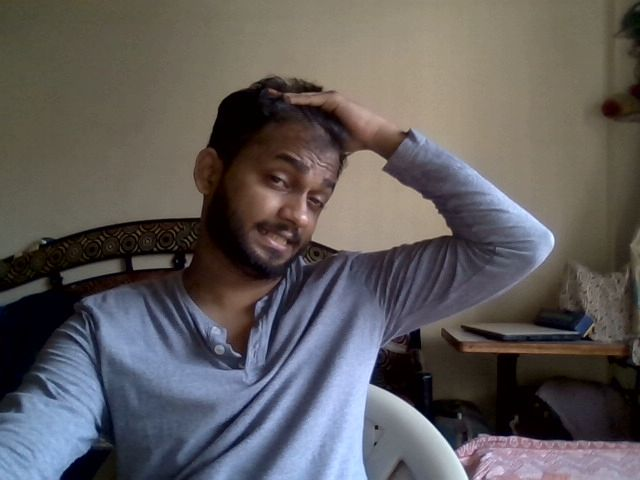

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
  img = ImageTk.PhotoImage(Image.open("logo.png"))

   heading = Label(root,image=img,bg='black')
    heading.pack() 